### U.S. Droughts Throughout Two Decades


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

#### Data Loading and Data Cleaning

In [2]:
df = pd.read_csv("data.csv")

# Rename some columns into better names
df = df.rename(columns={"valid_start": "start", "valid_end": "end", "state_abb": "state"})

# Remove unneeded columns of "stat_fmt" and "map_date".
df = df.drop(columns=["stat_fmt", "map_date"])

# Filter out data of Puerto Rico (PR) and Washington, D.C. (DC) as these aren't considered states.
df = df[(df["state"] != "DC") & (df["state"] != "PR")]

# Filter out instances of no droughts of a particular level
df = df[df["area_pct"] != 0]

# Filter out no drought instances
df = df[df["drought_lvl"] != "None"]

# Round `pop_total` to whole numbers since it shouldn't be decimal values.
df["pop_total"] = df["pop_total"].round().astype(int)

# Convert date columns to datetime objects
df["start"] = pd.to_datetime(df["start"])
df["end"] = pd.to_datetime(df["end"])

# Reorder columns
df = df[["start", "end", "state", "drought_lvl", "area_pct", "area_total", "pop_pct", "pop_total"]]

# df

#### 1) What is the percentage breakdown of all droughts by levels?

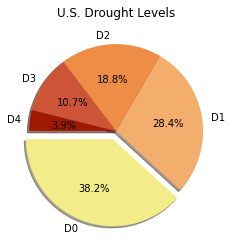

In [3]:
A1 = df.groupby("drought_lvl").size()
A1 = ((A1/A1.sum()) * 100)
# print(A1)

_ = A1.plot.pie(
    title="U.S. Drought Levels", 
    ylabel="", 
    shadow=True, 
    explode=(0.1, 0, 0, 0, 0), 
    autopct='%1.1f%%', 
    startangle=180, 
    colors=["#f3ed89","#f3ad6c","#ed8d46","#cd5436","#9f1900"]
)

#### 2) Which states experienced the most severe droughts (i.e. level D4)? 

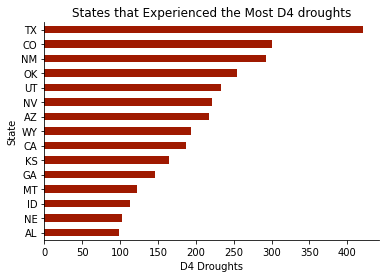

In [4]:
A2 = (df.groupby(["state", "drought_lvl"])["drought_lvl"]
        .count()
        .loc[:, "D4"]
        .sort_values(ascending=False)
        .head(15))
# print(A2)

A2_Plot = A2[::-1].plot.barh(
    title = "States that Experienced the Most D4 droughts",                         
    color=["#9f1900"],
    xlabel="State",
    ylabel="D4 Droughts"
)
A2_Plot.spines.right.set_visible(False)
A2_Plot.spines.top.set_visible(False)

_ = A2_Plot.set_xlabel("D4 Droughts")

#### 3. In which year did NJ had the greatest percentage of its droughts?

('2002', 18.544935805991443)


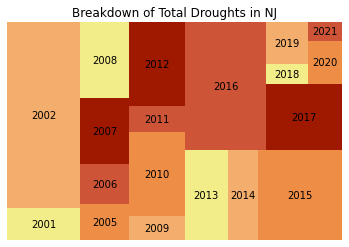

In [5]:
copy = df.copy()
copy["start"] = copy["start"].dt.strftime("%Y")
copy = copy[copy["state"] == "NJ"]
A3 = copy.groupby("start")["drought_lvl"].count()
A3 = ((A3/A3.sum()) * 100)
# print(A3)

print((A3.idxmax(), A3.max()))

plot = squarify.plot(
    A3, 
    label=A3.index, 
    color=["#f3ed89","#f3ad6c","#ed8d46","#cd5436","#9f1900"]*4,
    norm_x=200
)
_ = plot.set_title("Breakdown of Total Droughts in NJ")
_ = plot.axis("off")

#### 4. What is the average land area affected for each drought level for each year?


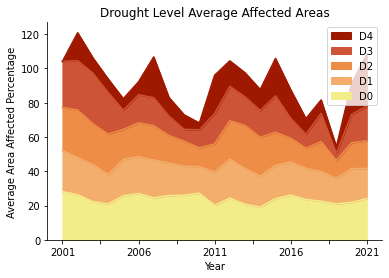

In [6]:
copy = df.copy()
copy["start"] = copy["start"].dt.strftime("%Y")

A4 = copy.pivot_table(
    "area_pct", 
    index="start", 
    columns="drought_lvl", 
    fill_value=0)
# print(A4)

A4_Plot = A4.plot.area(
    stacked=True, 
    title="Drought Level Average Affected Areas",
    color=['#f3ed89', '#f3ad6c', '#ed8d46', '#cd5436', '#9f1900'],
    xlabel="Year",
    ylabel="Average Area Affected Percentage")

A4_Plot.spines.right.set_visible(False)
A4_Plot.spines.top.set_visible(False)

A4_Plot.legend()
handles, labels = A4_Plot.get_legend_handles_labels()
A4_Plot.legend(reversed(handles), reversed(labels))


#### 5. In which months did the highest and lowest number of droughts occur respectively?

Highest:  October 9194
Lowest:  February 6872


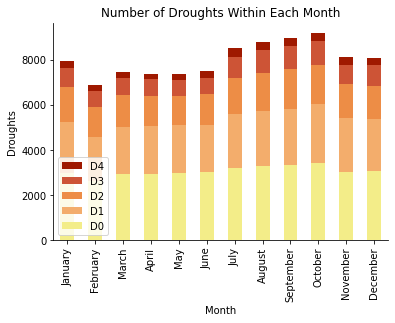

In [7]:
copy = df.copy()
copy["start"] = copy["start"].dt.strftime("%B")

A5 = copy.groupby(["start", "drought_lvl"])["drought_lvl"].count().unstack(level=1)
MONTHS = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
A5 = A5.reindex(MONTHS, axis=0)
A5_Plot = A5.plot.bar(
    stacked=True, 
    title="Number of Droughts Within Each Month",
    color=["#f3ed89","#f3ad6c","#ed8d46","#cd5436","#9f1900"],
    ylabel="Droughts",
    xlabel="Month"
)
# print(A5)

A5_Plot.spines.right.set_visible(False)
A5_Plot.spines.top.set_visible(False)

A5_Plot.legend()
handles, labels = A5_Plot.get_legend_handles_labels()
A5_Plot.legend(reversed(handles), reversed(labels))

answer = copy.groupby(["start"])["drought_lvl"].count()
print("Highest: ", answer.idxmax(), answer.max())
print("Lowest: ", answer.idxmin(), answer.min())

#### 6. Is there a correlation between the affected area of a drought and the affected population?

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


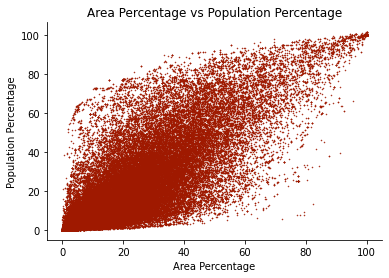

In [8]:
ratios = df[["area_pct", "pop_pct"]]

A6_Plot = df.plot.scatter("area_pct", "pop_pct", title="Area Percentage vs Population Percentage", color="#9f1900", s=0.25)
_ = A6_Plot.axes.set_xlabel("Area Percentage")
_ = A6_Plot.axes.set_ylabel("Population Percentage")

_ = A6_Plot.spines.right.set_visible(False)
_ = A6_Plot.spines.top.set_visible(False)

#### 7. What is the total number of droughts for each year?

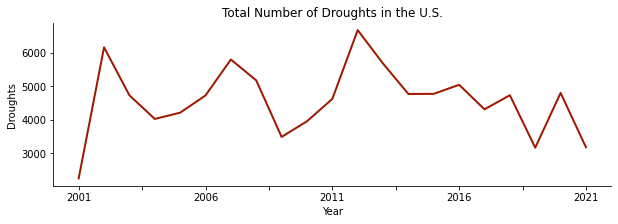

In [9]:
copy = df.copy()
copy["start"] = copy["start"].dt.strftime("%Y")

A7 = copy.groupby("start")["drought_lvl"].count()
# print(A7)

A7_Plot = A7.plot(
    kind="line", 
    color="#9f1900", 
    figsize=(10, 3), 
    xlabel="Year",
    ylabel="Droughts", 
    linewidth=2, 
    title="Total Number of Droughts in the U.S."
)

A7_Plot.spines.right.set_visible(False)
A7_Plot.spines.top.set_visible(False)